<a href="https://colab.research.google.com/github/pdhoot16/Machine-Learning/blob/master/BostonDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Machine Learning CA2</h1>

---



## **Boston Housing Price Prediction - Neural Network using TensorFlow**

---



## **1. Import Dependencies**

In [0]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import random

##  2. Load Dataset

In [0]:
boston = load_boston()
print( "type of boston = ", type(boston))

type of boston =  <class 'sklearn.utils.Bunch'>


In [0]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [0]:
boston.data.shape

(506, 13)

In [0]:
print( boston.feature_names )

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [0]:
print( boston.DESCR )

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 3. Seperate Data into Features and Labels and load them as a Pandas Dataframe

### 3.1 Features

In [0]:
features_df = pd.DataFrame(np.array(boston.data), columns=[boston.feature_names])
features_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 3.2 Labels

In [0]:
labels_df = pd.DataFrame(np.array(boston.target), columns=['labels'])
labels_df.head()

,labels
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 3.3 Combined Data

In [0]:
combined_data = pd.concat([features_df,labels_df], axis=1)
combined_data.head()

,"(CRIM,)","(ZN,)","(INDUS,)","(CHAS,)","(NOX,)","(RM,)","(AGE,)","(DIS,)","(RAD,)","(TAX,)","(PTRATIO,)","(B,)","(LSTAT,)",labels
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 4. Train Test Split

### 4.1 Import Library

In [0]:
from sklearn.model_selection import train_test_split

### 4.2  Train Test Split
### Training Data = 80% of Dataset
### Test Data = 20% of Dataset

In [0]:
random.seed( 1000 )
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.2)

## 5. Data Pre-Processing

### 5.1 Import Library

In [0]:
from sklearn.preprocessing import StandardScaler

### 5.2 Train Data

### 5.2.1  Define the Preprocessing Method and Fit Training Data to it

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

### 5.2.2. Make X_train to be the Scaled Version of Data
#### This process scales all the values in all 6 columns and replaces them with the new values

In [0]:
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

### 5.2.3. Converting from Pandas Dataframe to Numpy Arrays

In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)

### 5.2.4. Get the Type of Training Data

In [0]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

### 5.3. Test Data

### 5.3.1 Define the Preprocessing Method and Fit Test Data to it

In [0]:
scal = StandardScaler()
scal.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

### 5.3.2. Make X_test to be the Scaled Version of Data
#### This process scales all the values in all columns and replaces them with the new values

In [0]:
X_test = pd.DataFrame(data=scal.transform(X_test), columns=X_test.columns, index=X_test.index)

### 5.3.3. Converting from Pandas Dataframe to Numpy Arrays

In [0]:
X_test = np.array(X_test)
y_test = np.array(y_test)

### 5.3.4. Get the Type of Test Data

In [0]:
type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray)

### 5.4. Define Feature Columns

In [0]:
features_df.columns

MultiIndex(levels=[['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN']],
           codes=[[3, 12, 5, 2, 7, 10, 0, 4, 9, 11, 8, 1, 6]])

In [0]:
# Make Feature Columns
feat_cols = [tf.feature_column.numeric_column('x', shape=np.array(X_train).shape[1:])]

### 5.5. Define Input Fuction

In [0]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train}, y_train, batch_size=1, num_epochs=2000, shuffle=True)

### 5.6. Set up Estimator Training Inputs

In [0]:
train_input_func = tf.estimator.inputs.numpy_input_fn(X_train, y_train, batch_size=1, num_epochs=1000, shuffle=False)

### 5.7. Set up Estimator Test Inputs

In [0]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': X_test}, y_test, batch_size=1, num_epochs=1, shuffle=False)

## 6. Build Model

### 6.1. Define DNN Regressor Model

In [0]:
dnn_model = tf.estimator.DNNRegressor(hidden_units=[5,3],feature_columns=feat_cols, optimizer='Adam')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0lt4x_9g', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fdf3bba65c0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### 6.2. Train the DNN Regressor Estimator

In [0]:
dnn_model.train(input_fn=input_func, steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpbz_6adrj/model.ckpt.
INFO:tensorflow:loss = 195.28731, step = 1
INFO:tensorflow:global_step/sec: 337.552
INFO:tensorflow:loss = 5.864019, step = 101 (0.298 sec)
INFO:tensorflow:global_step/sec: 801.141
INFO:tensorflow:loss = 0.5043886, step = 201 (0.124 sec)
INFO:tensorflow:global_step/sec: 805.564
INFO:tensorflow:loss = 14.865559, step = 301 (0.126 sec)
INFO:tensorflow:global_step/sec: 758.423
INFO:tensorflow:loss = 170.58736, step = 401 (0.137 sec)
INFO:tensorflow:global_step/sec: 766.213
INFO:tensorflow:loss = 25.104078, step = 501 (0.125 sec)
INFO:tensorflow:global_step/sec: 797.304
INFO:tensorflow:loss = 4.119842, step = 601 (0.127 sec)
INFO:tensorflow:global_step/sec: 813.794
INFO:tensorflow:lo

## 7. Evaluate the Model

In [0]:
dnn_model.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-23T00:59:05Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbz_6adrj/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-23-00:59:06
INFO:tensorflow:Saving dict for global step 2000: average_loss = 34.133728, global_step = 2000, label/mean = 23.318632, loss = 34.133728, prediction/mean = 20.322952
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: /tmp/tmpbz_6adrj/model.ckpt-2000


{'average_loss': 34.133728,
 'global_step': 2000,
 'label/mean': 23.318632,
 'loss': 34.133728,
 'prediction/mean': 20.322952}

### 7.1. Predictions

In [0]:
predictions = dnn_model.predict(input_fn=eval_input_func)

In [0]:
pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbz_6adrj/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


### 7.2. Get Predicted Values

In [0]:
predicted_vals = []

for pred in dnn_model.predict(input_fn=eval_input_func):
    predicted_vals.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbz_6adrj/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
print(predicted_vals)

[array([20.360134], dtype=float32), array([30.279732], dtype=float32), array([11.304831], dtype=float32), array([24.471317], dtype=float32), array([36.50297], dtype=float32), array([21.998325], dtype=float32), array([18.527538], dtype=float32), array([17.21916], dtype=float32), array([21.1609], dtype=float32), array([17.617434], dtype=float32), array([27.942719], dtype=float32), array([32.17539], dtype=float32), array([18.20903], dtype=float32), array([33.45327], dtype=float32), array([17.927814], dtype=float32), array([16.2692], dtype=float32), array([16.143616], dtype=float32), array([15.779915], dtype=float32), array([15.00259], dtype=float32), array([21.332397], dtype=float32), array([35.041054], dtype=float32), array([21.425468], dtype=float32), array([16.106365], dtype=float32), array([16.836987], dtype=float32), array([27.753185], dtype=float32), array([11.304831], dtype=float32), array([11.304831], dtype=float32), array([21.411331], dtype=float32), array([20.783821], dtype=floa

## 8. Performance Evalution

### 8.1 Import Library

In [0]:
from sklearn.metrics import mean_squared_error


### 8.2. Calculate the Mean Squared Error

In [0]:
mse = mean_squared_error(predicted_vals, y_test)
print('Mean Squared Error [DNNRegrssor]: ',mse)

Mean Squared Error [DNNRegrssor]:  34.133724020313245


##  9. Improve the Performance by changing Parameters

### 9.1.  Redefine DNN Regressor Model

In [0]:
dnn_model_imp = tf.estimator.DNNRegressor(hidden_units=[10,5,3],feature_columns=feat_cols, optimizer=tf.train.ProximalAdagradOptimizer(
      learning_rate=0.1,l1_regularization_strength=0.001))

 ### 9.2. Re-train the DNN Regressor Estimator

In [0]:
dnn_model_imp.train(input_fn=input_func, steps=2000)

### 9.3. Re-evaluate the Model

In [0]:
dnn_model_imp.evaluate(input_fn=eval_input_func)

### 9.4. New Predictions

In [0]:
new_predictions = dnn_model_imp.predict(input_fn=eval_input_func)

In [0]:
new_pred = list(new_predictions)

### 9.5. New Predicted values

In [0]:
new_predicted_vals = []

for new_pred in dnn_model_imp.predict(input_fn=eval_input_func):
    new_predicted_vals.append(new_pred['predictions'])

In [0]:
print(new_predicted_vals)

### 9.6. Re-calculate the Mean Squared Error

In [0]:
new_mse = mean_squared_error(new_predicted_vals, y_test)
print('Improved Mean Squared Error [DNNRegrssor]: ',new_mse)

Improved Mean Squared Error [DNNRegrssor]:  17.8268982643602


## 10. Compare Performace

In [0]:
print('Old Mean Squared Error: ',mse)
print('New Mean Squared Error: ',new_mse)

Old Mean Squared Error:  34.133724020313245
New Mean Squared Error:  17.8268982643602


## 11. Plot Actual vs Predicted Housing Price

Text(0.5, 1.0, 'Real vs Predicted Housing Prices')

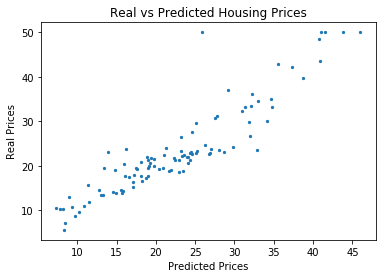

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter( new_predicted_vals, y_test, s=5 )
plt.xlabel( "Predicted Prices")
plt.ylabel( "Real Prices")
plt.title( "Real vs Predicted Housing Prices")